In [174]:
#!pip install pandas-profiling
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [175]:
#load the data set
bank=pd.read_csv('/content/bank-full.csv', sep=';')
bank

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [176]:
ProfileReport(bank)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [177]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**EDA**

In [178]:
# To check number of missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [179]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [180]:
bank['job'].value_counts(normalize=True)*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [181]:
bank['job'].replace(to_replace='unknown', value='blue-collar', inplace=True)
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [182]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [183]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [184]:
bank['education'].value_counts(normalize=True)*100

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

In [185]:
bank['education'].replace(to_replace='unknown', value='secondary', inplace=True)
bank['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [186]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [187]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [188]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [189]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [190]:
bank['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [191]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [192]:
bank['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

In [193]:
bank['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [194]:
bank['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [195]:
bank['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [196]:
bank['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [197]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [198]:
bank['poutcome'].value_counts(normalize=True)*100

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

Almost 82% are unknown in poutcome features so, i will drop the that column

In [199]:
bank.drop('poutcome', axis=1, inplace=True)

In [200]:
bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Visualisation

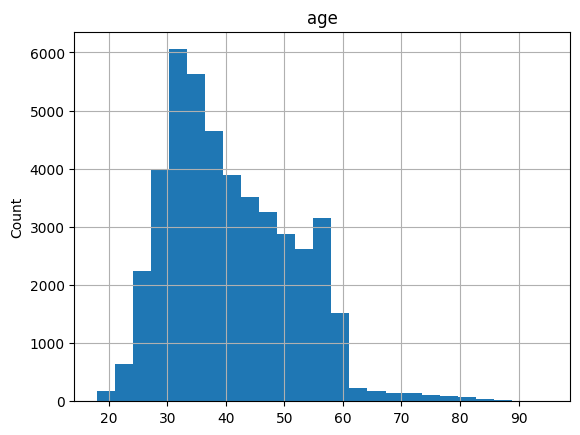

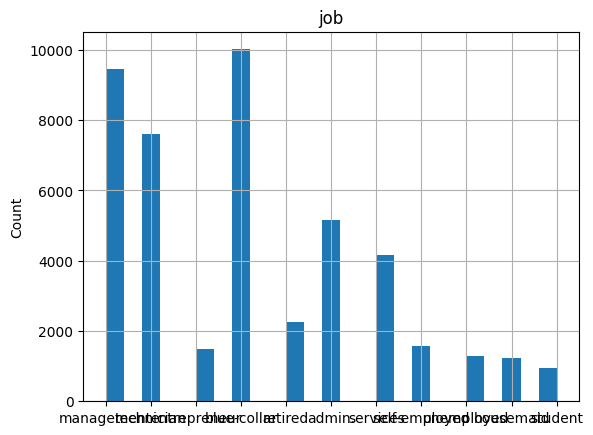

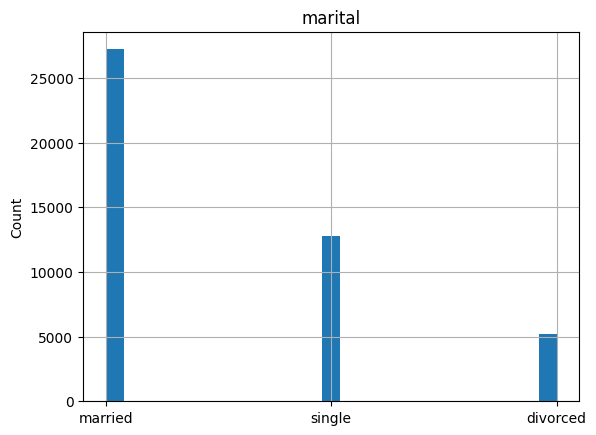

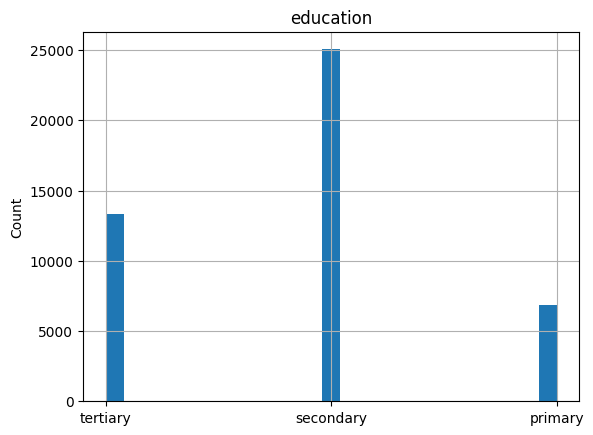

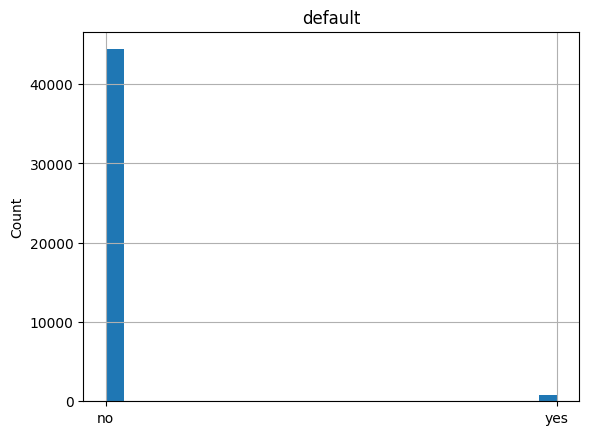

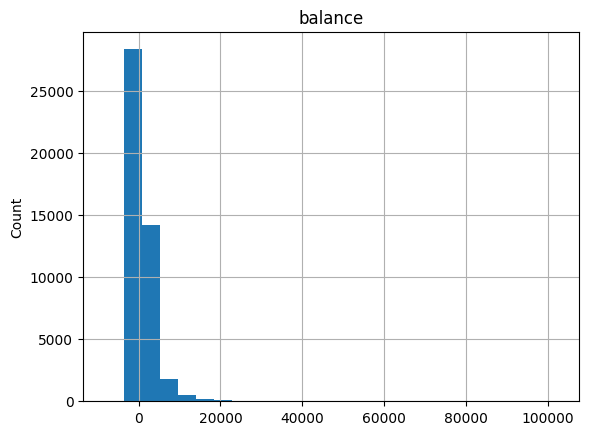

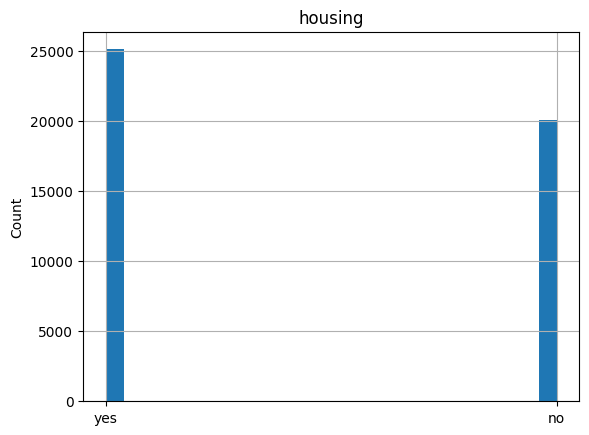

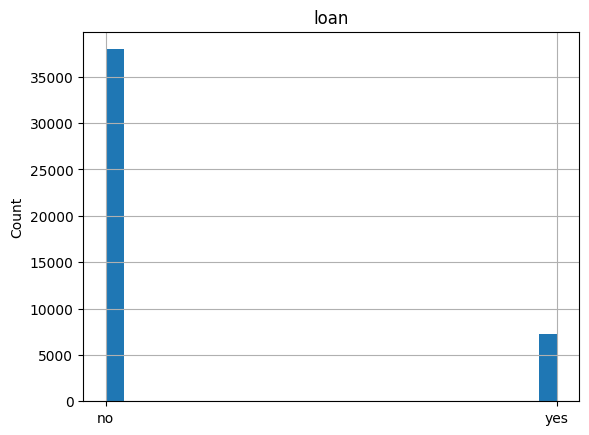

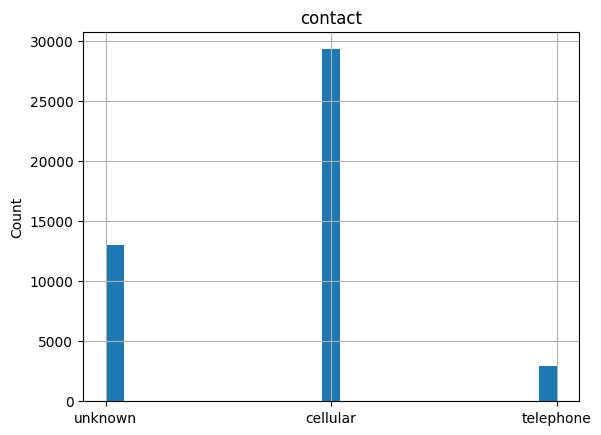

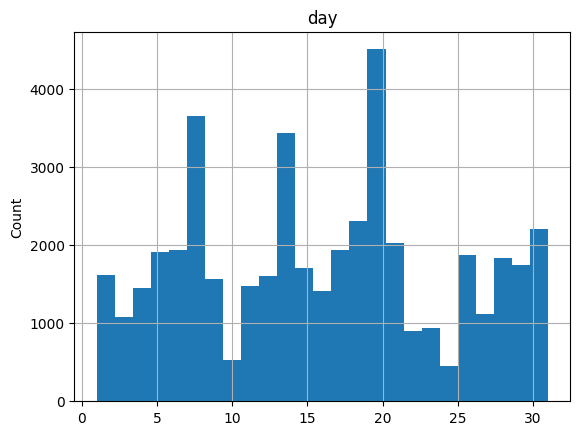

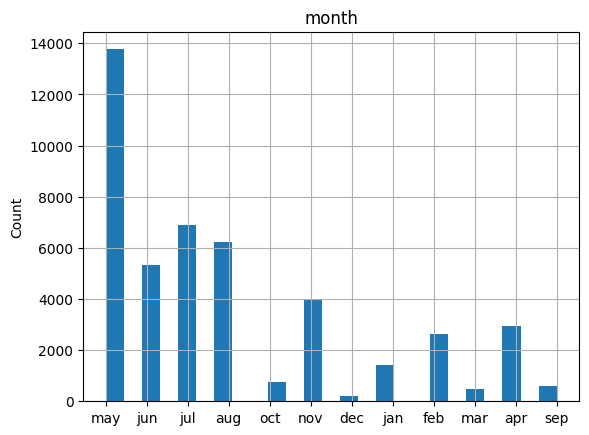

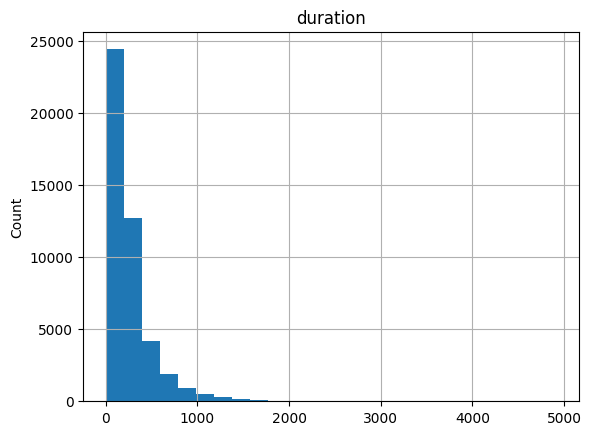

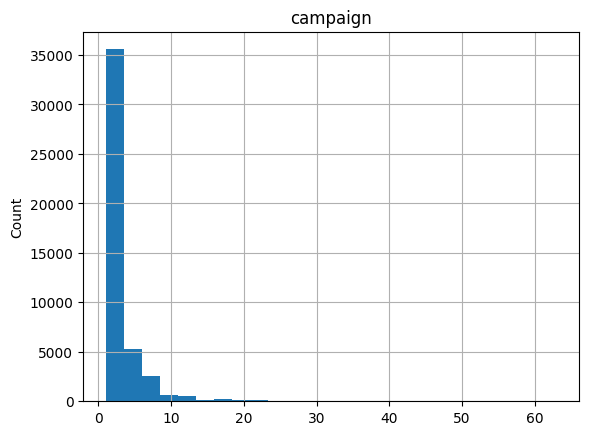

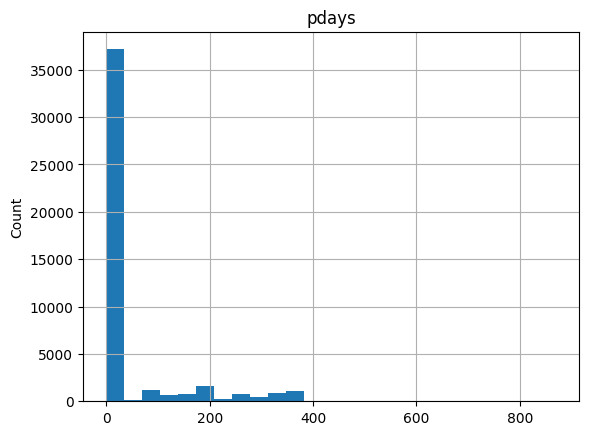

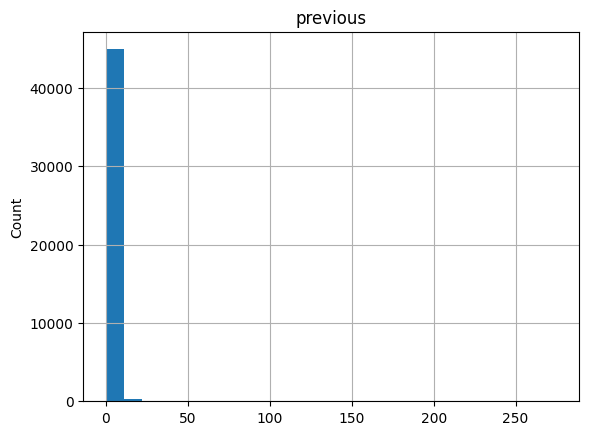

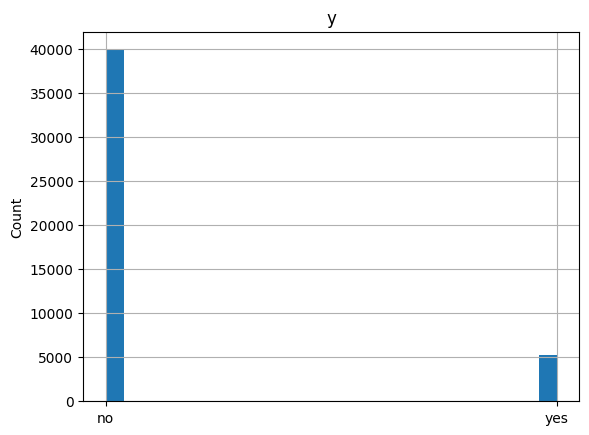

In [201]:
for feature in bank.columns:
    data=bank.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [202]:
bank[bank.duplicated()]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, y]
Index: []

In [203]:
bank.nunique()

age            77
job            11
marital         3
education       3
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
y               2
dtype: int64

One-Hot Encoding

In [204]:
bank1=pd.get_dummies(bank,columns=['job','marital','education','contact'])
bank1

age default  balance housing loan  day month  duration  campaign  \
0       58      no     2143     yes   no    5   may       261         1   
1       44      no       29     yes   no    5   may       151         1   
2       33      no        2     yes  yes    5   may        76         1   
3       47      no     1506     yes   no    5   may        92         1   
4       33      no        1      no   no    5   may       198         1   
...    ...     ...      ...     ...  ...  ...   ...       ...       ...   
45206   51      no      825      no   no   17   nov       977         3   
45207   71      no     1729      no   no   17   nov       456         2   
45208   72      no     5715      no   no   17   nov      1127         5   
45209   57      no      668      no   no   17   nov       508         4   
45210   37      no     2971      no   no   17   nov       361         2   

       pdays  ...  job_unemployed marital_divorced  marital_married  \
0         -1  ...               0                0                1   
1         -1  ...               0                0                0   
2         -1  ...               0                0                1   
3         -1  ...               0                0                1   
4         -1  ...               0                0                0   
...      ...  ...             ...              ...              ...   
45206     -1  ...               0                0                1   
45207     -1  ...               0                1                0   
45208    184  ...               0                0                1   
45209     -1  ...               0                0                1   
45210    188  ...               0                0                1   

       marital_single  education_primary  education_secondary  \
0                   0                  0                    0   
1                   1                  0                    1   
2                   0                  0                    1   
3                   0                  0                    1   
4                   1                  0                    1   
...               ...                ...                  ...   
45206               0                  0                    0   
45207               0                  1                    0   
45208               0                  0                    1   
45209               0                  0                    1   
45210               0                  0                    1   

       education_tertiary  contact_cellular  contact_telephone  \
0                       1                 0                  0   
1                       0                 0                  0   
2                       0                 0                  0   
3                       0                 0                  0   
4                       0                 0                  0   
...                   ...               ...                ...   
45206                   1                 1                  0   
45207                   0                 1                  0   
45208                   0                 1                  0   
45209                   0                 0                  1   
45210                   0                 1                  0   

       contact_unknown  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
45206                0  
45207                0  
45208                0  
45209                0  
45210                0  

[45211 rows x 32 columns]

In [205]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

Custom Binary Encoding of Binary o/p variables 

In [206]:
bank1['default']=np.where(bank1['default'].str.contains("yes"),1,0)
bank1['housing']=np.where(bank1['housing'].str.contains('yes'),1,0)
bank1['loan']=np.where(bank1['loan'].str.contains("yes"),1,0)
bank1['y']=np.where(bank1['y'].str.contains('yes'),1,0)
bank1

age  default  balance  housing  loan  day month  duration  campaign  \
0       58        0     2143        1     0    5   may       261         1   
1       44        0       29        1     0    5   may       151         1   
2       33        0        2        1     1    5   may        76         1   
3       47        0     1506        1     0    5   may        92         1   
4       33        0        1        0     0    5   may       198         1   
...    ...      ...      ...      ...   ...  ...   ...       ...       ...   
45206   51        0      825        0     0   17   nov       977         3   
45207   71        0     1729        0     0   17   nov       456         2   
45208   72        0     5715        0     0   17   nov      1127         5   
45209   57        0      668        0     0   17   nov       508         4   
45210   37        0     2971        0     0   17   nov       361         2   

       pdays  ...  job_unemployed  marital_divorced  marital_married  \
0         -1  ...               0                 0                1   
1         -1  ...               0                 0                0   
2         -1  ...               0                 0                1   
3         -1  ...               0                 0                1   
4         -1  ...               0                 0                0   
...      ...  ...             ...               ...              ...   
45206     -1  ...               0                 0                1   
45207     -1  ...               0                 1                0   
45208    184  ...               0                 0                1   
45209     -1  ...               0                 0                1   
45210    188  ...               0                 0                1   

       marital_single  education_primary  education_secondary  \
0                   0                  0                    0   
1                   1                  0                    1   
2                   0                  0                    1   
3                   0                  0                    1   
4                   1                  0                    1   
...               ...                ...                  ...   
45206               0                  0                    0   
45207               0                  1                    0   
45208               0                  0                    1   
45209               0                  0                    1   
45210               0                  0                    1   

       education_tertiary  contact_cellular  contact_telephone  \
0                       1                 0                  0   
1                       0                 0                  0   
2                       0                 0                  0   
3                       0                 0                  0   
4                       0                 0                  0   
...                   ...               ...                ...   
45206                   1                 1                  0   
45207                   0                 1                  0   
45208                   0                 1                  0   
45209                   0                 0                  1   
45210                   0                 1                  0   

       contact_unknown  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
45206                0  
45207                0  
45208                0  
45209                0  
45210                0  

[45211 rows x 32 columns]

Label encoding

In [207]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
bank1=bank1.replace(order)
bank1

age  default  balance  housing  loan  day  month  duration  campaign  \
0       58        0     2143        1     0    5      5       261         1   
1       44        0       29        1     0    5      5       151         1   
2       33        0        2        1     1    5      5        76         1   
3       47        0     1506        1     0    5      5        92         1   
4       33        0        1        0     0    5      5       198         1   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
45206   51        0      825        0     0   17     11       977         3   
45207   71        0     1729        0     0   17     11       456         2   
45208   72        0     5715        0     0   17     11      1127         5   
45209   57        0      668        0     0   17     11       508         4   
45210   37        0     2971        0     0   17     11       361         2   

       pdays  ...  job_unemployed  marital_divorced  marital_married  \
0         -1  ...               0                 0                1   
1         -1  ...               0                 0                0   
2         -1  ...               0                 0                1   
3         -1  ...               0                 0                1   
4         -1  ...               0                 0                0   
...      ...  ...             ...               ...              ...   
45206     -1  ...               0                 0                1   
45207     -1  ...               0                 1                0   
45208    184  ...               0                 0                1   
45209     -1  ...               0                 0                1   
45210    188  ...               0                 0                1   

       marital_single  education_primary  education_secondary  \
0                   0                  0                    0   
1                   1                  0                    1   
2                   0                  0                    1   
3                   0                  0                    1   
4                   1                  0                    1   
...               ...                ...                  ...   
45206               0                  0                    0   
45207               0                  1                    0   
45208               0                  0                    1   
45209               0                  0                    1   
45210               0                  0                    1   

       education_tertiary  contact_cellular  contact_telephone  \
0                       1                 0                  0   
1                       0                 0                  0   
2                       0                 0                  0   
3                       0                 0                  0   
4                       0                 0                  0   
...                   ...               ...                ...   
45206                   1                 1                  0   
45207                   0                 1                  0   
45208                   0                 1                  0   
45209                   0                 0                  1   
45210                   0                 1                  0   

       contact_unknown  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
45206                0  
45207                0  
45208                0  
45209                0  
45210                0  

[45211 rows x 32 columns]

In [208]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

Model Building

In [209]:
# Dividing our data into input and output variables
x=pd.concat([bank1.iloc[:,0:11],bank1.iloc[:,12:]],axis=1)
y=bank1.iloc[:,11]

In [210]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Predictions

In [211]:
#Threshold value>0.5=1 else Threshold value<0.5=0 
np.set_printoptions(suppress=True)
pred_prob=classifier.predict_proba(x)[0:20]
pred_prob

array([[0.91875902, 0.08124098],
       [0.93500757, 0.06499243],
       [0.93790751, 0.06209249],
       [0.95668777, 0.04331223],
       [0.86337028, 0.13662972],
       [0.89821097, 0.10178903],
       [0.85418476, 0.14581524],
       [0.81733079, 0.18266921],
       [0.96141012, 0.03858988],
       [0.95031532, 0.04968468],
       [0.90184635, 0.09815365],
       [0.90170341, 0.09829659],
       [0.84893131, 0.15106869],
       [0.96811028, 0.03188972],
       [0.95456981, 0.04543019],
       [0.87583985, 0.12416015],
       [0.94569053, 0.05430947],
       [0.97076223, 0.02923777],
       [0.93692232, 0.06307768],
       [0.93792807, 0.06207193]])

In [212]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [213]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

actual_y  y_pred_prob
0             0            0
1             0            0
2             0            0
3             0            0
4             0            0
...         ...          ...
45206         1            0
45207         1            0
45208         1            0
45209         0            0
45210         0            1

[45211 rows x 2 columns]

In [214]:
TP=len(y_pred_df[(y_pred_df['actual_y']==1) & (y_pred_df['y_pred_prob']==1)])
TN=len(y_pred_df[(y_pred_df['actual_y']==0) & (y_pred_df['y_pred_prob']==0)])
FP=len(y_pred_df[(y_pred_df['actual_y']==0) & (y_pred_df['y_pred_prob']==1)])
FN=len(y_pred_df[(y_pred_df['actual_y']==1) & (y_pred_df['y_pred_prob']==0)])

In [215]:
print('True Positives', TP)
print('True Negatives',TN)
print('False Positives', FP)
print('False Negatives', FN)

True Positives 983
True Negatives 39145
False Positives 777
False Negatives 4306


In [216]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39145,   777],
       [ 4306,   983]])

In [217]:
#Checking for Accuracy in terms of percentage
# The model accuracy is calculated by (TP+TN)/(TP+TN+FP+FN)
(39171+953)/(39171+953+751+4336)

0.8874831346353763

In [218]:
#Checking for Sensitivity/Recall
Sensitivity=(TP/(TP+FN))
print('Sensitivity',round(Sensitivity,2))

Sensitivity 0.19


In [219]:
#Checking for Specificity
Specificity=(TN/(TN+FP))
print('Specificity',round(Specificity,2))

Specificity 0.98


In [220]:
#Checking for Precision
Precision=(TP/(TP+FP))
print('Precision',round(Precision,2))

Precision 0.56


In [221]:
#Checking for F-Score
F_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print('F_Score',round(F_Score,2))

F_Score 0.28


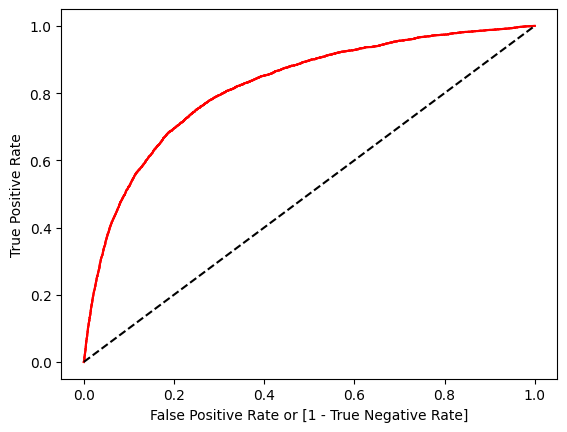

auc accuracy: 0.5831972436059353


In [222]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)